/opt/anaconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


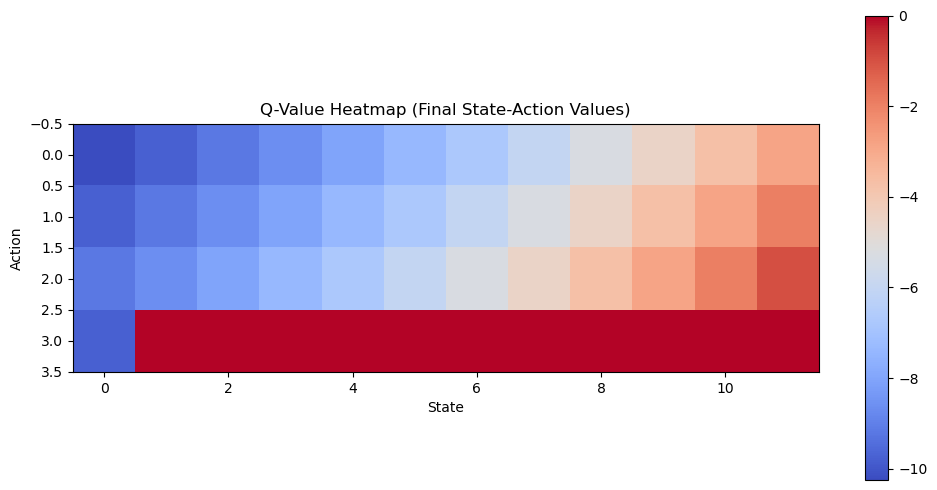


Final Q-table: [[ -10.64987013  -10.246497    -10.24649448  -10.72518915]
 [ -10.24549111   -9.73315833   -9.73315832  -10.7338983 ]
 [  -9.73301137   -9.19279825   -9.19279824  -10.24649281]
 [  -9.19277541   -8.62399815   -8.62399815   -9.73311306]
 [  -8.62395889   -8.02526122   -8.02526122   -9.19279713]
 [  -8.02526116   -7.39501181   -7.39501181   -8.62395084]
 [  -7.39501149   -6.73159137   -6.73159137   -8.02525391]
 [  -6.73158987   -6.03325408   -6.03325408   -7.39498627]
 [  -6.03325378   -5.29816219   -5.29816219   -6.73144166]
 [  -5.29815755   -4.52438125   -4.52438125   -6.03325221]
 [  -4.52438116   -3.709875     -3.709875     -5.29813626]
 [  -3.70983794   -3.70984987   -2.8525       -4.52435177]
 [ -10.7341179    -9.73315833   -9.73315833  -10.24650042]
 [ -10.24650039   -9.19279825   -9.19279825  -10.24650042]
 [  -9.73315827   -8.62399815   -8.62399815   -9.73315833]
 [  -9.19279823   -8.02526122   -8.02526122   -9.19279824]
 [  -8.62399815   -7.39501181   -7.39501

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

env = gym.make("CliffWalking-v0")
alpha = 0.7
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 1000
max_steps = 100

Q = np.zeros((env.observation_space.n, env.action_space.n))
q_values_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    for step in range(max_steps):
        next_state, reward, done, _, _ = env.step(action)
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state
        action = next_action
        if done:
            break
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    q_values_history.append(np.copy(Q))

plt.figure(figsize=(10, 5))
q_table = np.max(Q, axis=1).reshape((4, 12))
plt.imshow(q_table, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Q-Value Heatmap (Final State-Action Values)")
plt.xlabel("State")
plt.ylabel("Action")
plt.tight_layout()
plt.show()

print("\nFinal Q-table:", Q)